In [37]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('spam.csv', encoding='latin1')
# Keeping only the neccessary columns
data = data[['v2','v1']]
print(data)

data['v2'] = data['v2'].apply(lambda x: x.lower())
data['v2'] = data['v2'].apply((lambda x: re.sub('[^a-zA-Z0-9\s]', '', x)))
print(data["v2"])

for idx, row in data.iterrows():
  row[0] = row[0].replace('rt', ' ')
print(data)

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['v2'].values)
X = tokenizer.texts_to_sequences(data['v2'].values)
print(X)

X = pad_sequences(X)
print(X.shape)

embed_dim = 128
lstm_out = 196

def createmodel():
    model = tf.keras.Sequential()
    tf.keras.model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
    tf.keras.model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
    tf.keras.model.add(Dense(2,activation='sigmoid'))
    tf.keras.model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
    return model
# print(model.summary())

labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(data['v1'])
y = to_categorical(integer_encoded)
print(y)

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

history = model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size, verbose = 2,validation_data=(X_test, Y_test))
model.save('spam.h5')
score,acc = model.evaluate(X_test,Y_test,verbose=2,batch_size=batch_size)
print(score)
print(acc)
print(model.metrics_names)


                                                     v2    v1
0     Go until jurong point, crazy.. Available only ...   ham
1                         Ok lar... Joking wif u oni...   ham
2     Free entry in 2 a wkly comp to win FA Cup fina...  spam
3     U dun say so early hor... U c already then say...   ham
4     Nah I don't think he goes to usf, he lives aro...   ham
...                                                 ...   ...
5567  This is the 2nd time we have tried 2 contact u...  spam
5568              Will Ì_ b going to esplanade fr home?   ham
5569  Pity, * was in mood for that. So...any other s...   ham
5570  The guy did some bitching but I acted like i'd...   ham
5571                         Rofl. Its true to its name   ham

[5572 rows x 2 columns]
0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say

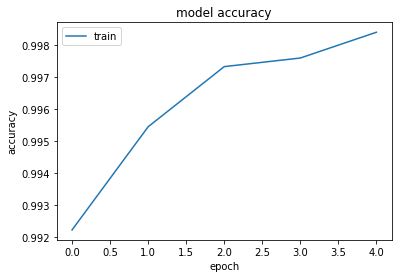

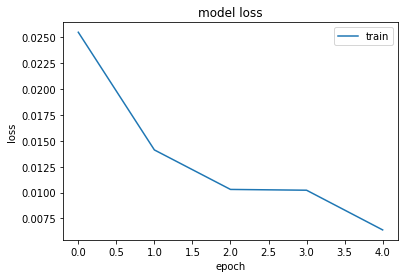

In [38]:
#accuracy
pyplot.plot(history.history['accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()

# loss
pyplot.plot(history.history['loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper right')
pyplot.show()
